# Investigate the non-Bot data

This document investigates the non-bot data to try and validate the data further to ensure accurate responses.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from driverCleanData import cleanData
%matplotlib inline
[sht,_] = cleanData();
newData = pd.read_csv('./newData.csv', names=["Index","Score"])
shtNonBot = sht.loc[newData.index]

There are 0 duplicates


In [20]:
print('There were {0} respondents who said they have an ETD'.format(shtNonBot.DoYouHaveAMotionControlETD.sum()))

There were 127.0 respondents who said they have an ETD


In [21]:
suspect = shtNonBot[(shtNonBot['DoYouHaveAMotionControlETD']==1) & (shtNonBot["PrimaryTerminalDevice"] != 'Motion Control (MC) ETD') & (shtNonBot['SecondaryDevice'] != 'Motion Control (MC) ETD')]
print('There were {0} respondents who said they have an ETD, but dont use it as a primary or secondary'.format(suspect.count()[1]))

There were 98 respondents who said they have an ETD, but dont use it as a primary or secondary


Let's look at the first few data entries of the respondents who said they have an ETD, but dont use it as a primary or secondary

In [10]:
suspect.head()

,RespondentID,CollectorID,StartDate,EndDate,IPAdress,EmailAddress,First Name,LastName,EmptyColumn,Age,...,weightedTaskScore,doYouUseProsthesisOpus,doYouUseProsthesisFull,doYouUseProsthesisTask,numberTasksUseProsthesisOpus,numberTasksUseProsthesisFull,numberTasksUseProsthesisTask,normalizedOpus,normalizedFull,normalizedTask
20.0,5.193542e+09,94652692.0,2017-01-28 02:27:58,2017-01-28 02:35:20,69.167.13.241,NaN,NaN,NaN,NaN,35 to 44,...,118.0,54.0,77.0,23.0,20.0,28.0,8.0,2.700000,2.750000,2.875
24.0,5.193521e+09,94652692.0,2017-01-28 01:58:56,2017-01-28 02:04:34,104.237.86.79,NaN,NaN,NaN,NaN,35 to 44,...,141.0,70.0,98.0,28.0,20.0,28.0,8.0,3.500000,3.500000,3.500
217.0,5.189340e+09,94652692.0,2017-01-25 22:58:19,2017-01-25 23:10:33,99.11.243.42,NaN,NaN,NaN,NaN,35 to 44,...,127.0,51.0,60.0,9.0,13.0,16.0,3.0,3.923077,3.750000,3.000
236.0,5.188460e+09,94652692.0,2017-01-25 14:26:29,2017-01-25 14:33:19,67.229.136.194,NaN,NaN,NaN,NaN,25 to 34,...,137.0,70.0,94.0,24.0,20.0,28.0,8.0,3.500000,3.357143,3.000
263.0,5.188334e+09,94652692.0,2017-01-25 12:59:40,2017-01-25 13:10:34,54.153.105.106,NaN,NaN,NaN,NaN,18 to 24,...,134.0,41.0,45.0,4.0,11.0,12.0,1.0,3.727273,3.750000,4.000


Defintely some interesting things going on, the first to entries took less than 10 minutes to complete the survey.

Let's look into the time it took people to complete the survey.

### Time taken to complete survey

In [3]:
timeDiff = shtNonBot.EndDate - shtNonBot.StartDate
timeDiff = timeDiff.dropna()
timeDiff.describe()

count                       476
mean     0 days 00:15:23.794117
std      0 days 00:40:16.685575
min             0 days 00:01:06
25%             0 days 00:04:32
50%      0 days 00:07:35.500000
75%      0 days 00:14:07.250000
max             0 days 08:48:57
dtype: object

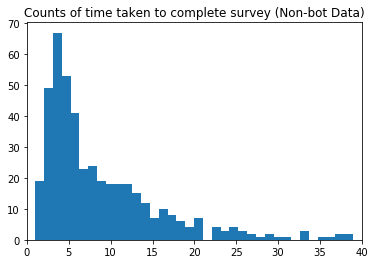

In [12]:
timeDiffMin = timeDiff.astype('timedelta64[m]')
plt.hist(timeDiffMin, bins=500)
plt.title('Counts of time taken to complete survey (Non-bot Data)')
plt.xlim([0,40])
plt.show()

In [13]:
pd.crosstab(timeDiffMin, 'c').sort_values(by = 'c', ascending=False).head()

col_0,c
row_0,
4.0,67
5.0,53
3.0,49
6.0,41
8.0,24


In [4]:
susIdx = timeDiff[timeDiff.astype('timedelta64[m]') < 15]
suspicious = shtNonBot.loc[susIdx.index]
notSusIdx = timeDiff[timeDiff.astype('timedelta64[m]') > 15]
notSuspicious = shtNonBot.loc[notSusIdx.index]

In [15]:
suspicious.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,RespondentID,CollectorID,EmailAddress,First Name,LastName,EmptyColumn,BrandOfBodyPoweredElbowSpecify,NumberOfDaysOfProsthesisIsWorn,DoYouHaveAHosmerHook,DoYouHaveATRSHook,...,weightedTaskScore,doYouUseProsthesisOpus,doYouUseProsthesisFull,doYouUseProsthesisTask,numberTasksUseProsthesisOpus,numberTasksUseProsthesisFull,numberTasksUseProsthesisTask,normalizedOpus,normalizedFull,normalizedTask
count,2.290000e+02,229.0,0.0,0.0,0.0,0.0,0.0,229.000000,229.000000,229.000000,...,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,227.000000
mean,5.180107e+09,94652692.0,NaN,NaN,NaN,NaN,NaN,5.991266,0.414847,0.331878,...,126.790393,55.969432,76.484716,20.515284,17.589520,24.279476,6.689956,3.201874,3.175980,3.103005
std,8.259684e+06,0.0,NaN,NaN,NaN,NaN,NaN,0.821804,0.493775,0.471919,...,16.751007,13.453100,19.191463,7.079497,4.008442,5.960437,2.211401,0.416554,0.398915,0.413051
min,5.166566e+09,94652692.0,NaN,NaN,NaN,NaN,NaN,4.000000,0.000000,0.000000,...,75.000000,21.000000,32.000000,0.000000,7.000000,9.000000,0.000000,2.450000,2.500000,2.250000
25%,5.170590e+09,94652692.0,NaN,NaN,NaN,NaN,NaN,5.000000,0.000000,0.000000,...,116.000000,52.000000,68.000000,17.000000,16.000000,20.000000,5.000000,2.850000,2.821429,NaN
50%,5.181888e+09,94652692.0,NaN,NaN,NaN,NaN,NaN,6.000000,0.000000,0.000000,...,124.000000,58.000000,80.000000,23.000000,20.000000,28.000000,8.000000,3.150000,3.157895,NaN
75%,5.186300e+09,94652692.0,NaN,NaN,NaN,NaN,NaN,7.000000,1.000000,1.000000,...,137.000000,66.000000,91.000000,25.000000,20.000000,28.000000,8.000000,3.500000,3.428571,NaN
max,5.197041e+09,94652692.0,NaN,NaN,NaN,NaN,NaN,7.000000,1.000000,1.000000,...,186.000000,80.000000,110.000000,32.000000,20.000000,28.000000,8.000000,4.000000,4.000000,4.000000


In [27]:
pd.concat([pd.crosstab(suspicious.PrimaryTerminalDevice, 'suspicious_count'), pd.crosstab(notSuspicious.PrimaryTerminalDevice, 'notSuspicious_count')], axis=1)

col_0,suspicious_count,notSuspicious_count
Body-powered Hand,50.0,9.0
Hosmer Hook,22.0,8.0
Michelangelo Hand,25.0,11.0
Motion Control (MC) ETD,23.0,7.0
Motion Control (MC) Hand,119.0,16.0
Other (please specify),NaN,1.0
Otto Bock Axon Hook,8.0,NaN
Otto Bock Hand,49.0,6.0
Otto BockGreifer,6.0,NaN
Passive Hand,3.0,1.0


In [26]:
notSuspicious.count()[1]

65

In [18]:
notSusCheck = notSuspicious[(notSuspicious['DoYouHaveAMotionControlETD']==1) & (notSuspicious["PrimaryTerminalDevice"] != 'Motion Control (MC) ETD') & (notSuspicious['SecondaryDevice'] != 'Motion Control (MC) ETD')]
notSusCheck.count()[1]

16

In [19]:
from vectorSubsets import doYous
pd.concat(notSuspicious[doYous])

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

 how many respondents took the survey as a unilateral with no elbow (arm), listing only one TD ever used, and no secondary device. 

In [32]:
quick = sht[(sht['IAmABilateralWearer'] == 0) & (sht['SecondaryDevice']=='None')]
quick["timeDiff"] = quick.EndDate - quick.StartDate
quick['timeDiff'] = quick.timeDiff.astype('timedelta64[m]')
sht['timeDiff'] = sht.EndDate - sht.StartDate
sht['timeDiff'] = sht.timeDiff.astype('timedelta64[m]')
less10 = sht.timeDiff[sht['timeDiff'] < 10]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [36]:
quick.timeDiff.corr(less10)

1.0

Perfectly correlated.

In [31]:
quick.timeDiff.describe()

count    1074.000000
mean       13.922719
std        31.501543
min         1.000000
25%         4.000000
50%         7.000000
75%        13.000000
max       528.000000
Name: timeDiff, dtype: float64

In [35]:
less10.describe()

count    770.000000
mean       5.010390
std        1.935876
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: timeDiff, dtype: float64